# 10. Credible Intervals

Point estimates are too limited for many purposes. We'll usually want some more information about what the posterior is telling us. In classical statistics we might use a confidence interval. Credible intervals, or credible sets as Professor Vidakovic usually calls them, are the Bayesian answer.

The difference between confidence intervals and credible sets is a great entry point into the philosophical differences between frequentist and Bayesian reasoning. This [Stack Exchange](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval) post is a great read on the subject.

For our class, we'll be learning about HPD-credible sets and equitailed credible sets. Sometimes the homework will ask for one or the other, or both, so make sure you understand the difference. If the homework doesn't specify, you can use either, but the equitailed credible set is often easier to calculate.

A credible set on the posterior of parameter $\theta$, with credibility $1 - \alpha$, is defined as:

$$\int_{C} \pi(\theta | X) d\theta \geq 1 - \alpha$$

In other words, the probability that the posterior of $\theta$ is greater than or equal to $1 - \alpha$ within the bounds of $C$.

This definition is incomplete, as there are an infinite number of credible intervals meeting this definition. Depending on which further constraints we add, we can create different types of credible sets.

## Highest Posterior Density (HPD) intervals

The HPD-credible set is also known as the minimum-width credible interval. Professor Vidakovic defines the the additional constraint by limiting the credible region $C$ to the subset of the posterior where the density is greater than $k(\alpha)$. 

$$C = {\theta \in \Theta | \pi(\theta|x) \ge k(\alpha)}$$

Here $k(\alpha)$ is a threshold density level chosen such that the probability mass of the portion of the posterior distribution with density greater than $k(\alpha)$ is $1-\alpha$. It's a cutoff value for the posterior density function used to determine the HPD interval.

You can think of $k(\alpha)$ as the level or horizontal line that segments the posterior distribution into regions of higher and lower density, where higher is defined as density greater than $k(\alpha)$. Being horizontal guarantees it is the minimum-width region, while selecting the level decides the credibility or width of our set. 

Finding $k(\alpha)$ is an optimization problem. We'll go over some different ways to find it in the next lesson.

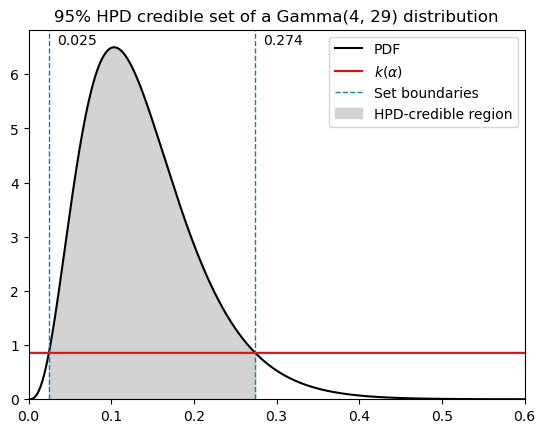

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

%load_ext lab_black

xx = np.linspace(0, 1, 1000000)
a, b = 4, 29
low, high = 0.0246, 0.2741
pdf = gamma.pdf(xx, a=a, scale=1 / b)

# density curve
plt.plot(xx, pdf, color="black", label="PDF")

# additional markings
plt.plot(xx, np.full_like(xx, 0.857), "r-", label="$k(\\alpha)$")
plt.axvline(low, linestyle="dashed", linewidth=1, label="Set boundaries")
plt.axvline(high, linestyle="dashed", linewidth=1)

plt.fill_between(
    xx,
    pdf,
    where=(low < xx) & (xx < high),
    color="lightgrey",
    label="HPD-credible region",
)
plt.legend()
plt.title("95% HPD credible set of a Gamma(4, 29) distribution")
plt.ylim(bottom=0)
plt.xlim(left=0, right=0.6)
plt.text(low + 0.01, 6.55, f"{low:.3f}", rotation=0)
plt.text(high + 0.01, 6.55, f"{high:.3f}", rotation=0)
plt.show()

This works fine for unimodal distributions. Things become more complicated if the posterior is multimodal or a monotonically decreasing function, like an exponential distribution. At that point we will need to use other strategies. Keep in mind that using $k(\alpha)$ is a means to an end, not our final goal.

## Equitailed intervals

Equitailed credible sets are exactly what they sound like. Here our second constraint is that each tail, or the area outside the credible region, is equal to $\alpha/2$.

$$\int_{-\infty}^{L} \pi(\theta | x) d\theta \leq \frac{\alpha}{2}; \int_{U}^{\infty} \pi(\theta | x) d\theta \leq \frac{\alpha}{2}$$

Finding the equitailed credible set is simpler than the HPD for known distributions, since you can make use of the inverse CDF or percent-point function of that distribution.

The plot below is the same distribution as above, but shows the 95% equitailed credible set instead. Notice that the line between the intersection of the set endpoints and the density curve is no longer horizontal, since this is no longer the minimum-width region.

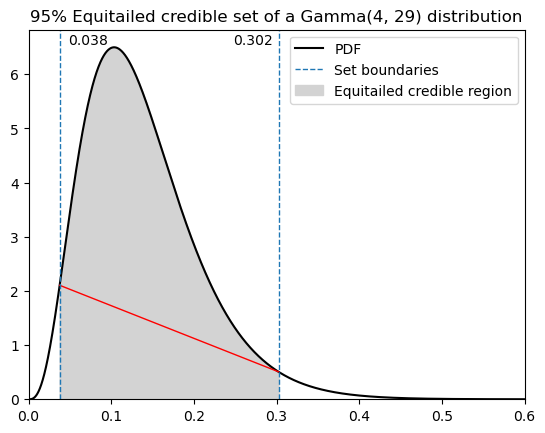

In [3]:
lower_eqt = gamma.ppf(0.025, a, scale=1 / b)
upper_eqt = gamma.ppf(0.975, a, scale=1 / b)

# density curve
plt.plot(xx, pdf, color="black", label="PDF")

# additional markings
plt.plot(
    [lower_eqt, upper_eqt],
    [gamma.pdf(lower_eqt, a, scale=1 / b), gamma.pdf(upper_eqt, a, scale=1 / b)],
    "r-",
    linewidth=1,
)
plt.axvline(lower_eqt, linestyle="dashed", linewidth=1, label="Set boundaries")
plt.axvline(upper_eqt, linestyle="dashed", linewidth=1)

plt.fill_between(
    xx,
    pdf,
    where=(lower_eqt < xx) & (xx < upper_eqt),
    color="lightgrey",
    label="Equitailed credible region",
)
plt.legend()
plt.title("95% Equitailed credible set of a Gamma(4, 29) distribution")
plt.ylim(bottom=0)
plt.xlim(left=0, right=0.6)
plt.text(lower_eqt + 0.01, 6.55, f"{lower_eqt:.3f}", rotation=0)
plt.text(upper_eqt - 0.055, 6.55, f"{upper_eqt:.3f}", rotation=0)
plt.show()